<a href="https://colab.research.google.com/github/sakuraizhao/githubTest/blob/main/%E6%9C%80%E7%B5%82%E3%83%AC%E3%83%9D%E3%83%BC%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install SALib

In [64]:
import pandas as pd
import numpy as  np
import csv
import seaborn as sns
import math
import scipy as sp
from scipy import stats
from scipy.special import comb
from SALib.sample import saltelli
from SALib.analyze import sobol
import matplotlib.pyplot  as plt
%matplotlib inline

In [13]:
# 1問目:

def psf(X1,X2,X3,X4,X5,X6,X7):
    A = X5 * X2 + 19.62 * X1 - X4*X3/X2
    V = X2 * (np.sqrt(A**2 + 4*X4*X5*X3*X6/X7) - A) / (2*X4)
    y = 2 * np.pi * np.sqrt(X1 / (X4 + X2**2 * X5 * X3 * X6 / (X7 * V**2)))
    return y

def mc_sample(n):
    rng = np.random.default_rng()
    X1 = rng.triangular(30, (30+60)/2, 60, n)
    X2 = rng.triangular(0.005, (0.005+0.02)/2, 0.02, n)
    X3 = rng.triangular(0.002, (0.002+0.01)/2, 0.01, n)
    X4 = rng.triangular(1000, (1000+5000)/2, 5000, n)
    X5 = rng.triangular(90000, (90000+110000)/2, 110000, n)
    X6 = rng.triangular(290, (290+296)/2, 296, n)
    X7 = rng.triangular(340, (340+360)/2, 360, n)

    Y = psf(X1,X2,X3,X4,X5,X6,X7)

    en = np.mean(Y)
    print('Yの期待値:', '{:.4f}'.format(en))
    vn = np.var(Y)
    se = np.sqrt(vn/n)
    bottom, up = stats.norm.interval(alpha=0.95, loc=en, scale=se)
    print('95%信頼区間:', '[ {:.4f} , {:.4f} ]'.format(bottom, up), '\n')

    Y_eve = []
    for i in range(len(Y)):
        if Y[i] <= 0.3:
           Y_eve.append(1)
        else:
           Y_eve.append(0)
    Y_prob = np.mean(Y_eve)
    print('Y≦0.3となる事象確率:', '{:.4f}'.format(Y_prob))
    yps = Y_prob - 1.96 * np.sqrt(Y_prob * (1 - Y_prob) / (n - 1))
    ypl = Y_prob + 1.96 * np.sqrt(Y_prob * (1 - Y_prob) / (n - 1))
    print('95%信頼区間:', '[ {:.4f} , {:.4f} ]'.format(yps, ypl), '\n')

    qn = np.percentile(Y, 90)
    print('Yの0.9分位数:', '{:.4f}'.format(qn))
    L = qn - 1.96 * np.sqrt(qn * (1 - qn) / (n - 1))
    R = qn + 1.96 * np.sqrt(qn * (1 - qn) / (n - 1))
    print('95%信頼区間:', '[ {:.4f} , {:.4f} ]'.format(L, R), '\n')

In [134]:
n = 100
print('\033[4m', "n=100の場合:", '\033[0m', '\n')
mc_sample(n)

n = 1000
print('\033[4m', "n=1000の場合:", '\033[0m', '\n')
mc_sample(n)

n = 10000
print('\033[4m', "n=10000の場合:", '\033[0m', '\n')
mc_sample(n)

n = 100000
print('\033[4m', "n=100000の場合:", '\033[0m', '\n')
mc_sample(n)

n = 1000000
print('\033[4m', "n=1000000の場合:", '\033[0m', '\n')
mc_sample(n)

 n=100の場合:  

Yの期待値: 0.4551
95%信頼区間: [ 0.4332 , 0.4771 ] 

Y≦0.3となる事象確率: 0.0800
95%信頼区間: [ 0.0266 , 0.1334 ] 

Yの0.9分位数: 0.6089
95%信頼区間: [ 0.5128 , 0.7050 ] 

 n=1000の場合:  

Yの期待値: 0.4626
95%信頼区間: [ 0.4565 , 0.4687 ] 

Y≦0.3となる事象確率: 0.0390
95%信頼区間: [ 0.0270 , 0.0510 ] 

Yの0.9分位数: 0.5974
95%信頼区間: [ 0.5669 , 0.6278 ] 

 n=10000の場合:  

Yの期待値: 0.4643
95%信頼区間: [ 0.4624 , 0.4662 ] 

Y≦0.3となる事象確率: 0.0324
95%信頼区間: [ 0.0289 , 0.0359 ] 

Yの0.9分位数: 0.5950
95%信頼区間: [ 0.5853 , 0.6046 ] 

 n=100000の場合:  

Yの期待値: 0.4635
95%信頼区間: [ 0.4629 , 0.4641 ] 

Y≦0.3となる事象確率: 0.0324
95%信頼区間: [ 0.0313 , 0.0335 ] 

Yの0.9分位数: 0.5941
95%信頼区間: [ 0.5910 , 0.5971 ] 

 n=1000000の場合:  

Yの期待値: 0.4636
95%信頼区間: [ 0.4635 , 0.4638 ] 

Y≦0.3となる事象確率: 0.0319
95%信頼区間: [ 0.0315 , 0.0322 ] 

Yの0.9分位数: 0.5940
95%信頼区間: [ 0.5931 , 0.5950 ] 



In [ ]:
# 問い(1)の考察:
# サンプルサイズが大きければ大きいほどYに関する基本統計量をより正確に推定することができる。
# 問い(1)ではサンプルサイズを100万個与えた場合、このシリンダー内のピストンの周期Yの期待値が0.4636に収束し、
# Yが0.3秒より短い確率が3.2%に収束し、
# Yの0.9分位数は0.59秒に収束することがわかる。
# また、下記のグラフからも、直観的に上記の3つの統計量の収束過程が見て取れる。

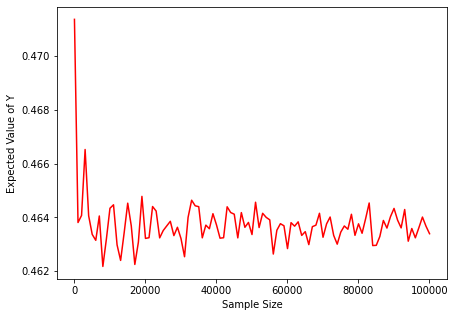

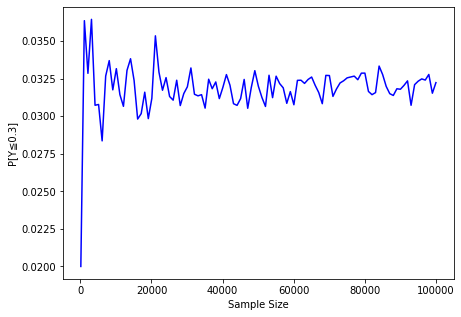

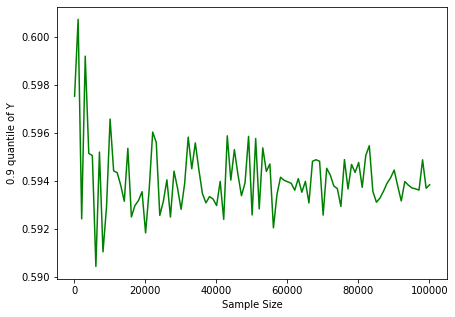

In [147]:
N=np.arange(100,101100,1000)
en1=[]
Y_prob1=[]
qn1=[]
for n in N:
    rng = np.random.default_rng()
    X1 = rng.triangular(30, (30+60)/2, 60, n)
    X2 = rng.triangular(0.005, (0.005+0.02)/2, 0.02, n)
    X3 = rng.triangular(0.002, (0.002+0.01)/2, 0.01, n)
    X4 = rng.triangular(1000, (1000+5000)/2, 5000, n)
    X5 = rng.triangular(90000, (90000+110000)/2, 110000, n)
    X6 = rng.triangular(290, (290+296)/2, 296, n)
    X7 = rng.triangular(340, (340+360)/2, 360, n)
    Y = psf(X1,X2,X3,X4,X5,X6,X7)
    en = np.mean(Y)
    en1.append(en)
    Y_eve = []
    for i in range(len(Y)):
        if Y[i] <= 0.3:
           Y_eve.append(1)
        else:
           Y_eve.append(0)
    Y_prob = np.mean(Y_eve)
    Y_prob1.append(Y_prob)
    qn = np.percentile(Y, 90)
    qn1.append(qn)
plt.figure(figsize=(7,5))
plt.xlabel('Sample Size')
plt.ylabel('Expected Value of Y')    
plt.plot(N, en1, color='red');
plt.figure(figsize=(7,5))
plt.xlabel('Sample Size')
plt.ylabel('P[Y≦0.3]')    
plt.plot(N, Y_prob1, color='blue');
plt.figure(figsize=(7,5))
plt.xlabel('Sample Size')
plt.ylabel('0.9 quantile of Y')    
plt.plot(N, qn1, color='green');

In [208]:
# 2問目:

N=[100,1000,10000,100000]

for n in N:
    rng = np.random.default_rng()
    X1 = rng.triangular(30, (30+60)/2, 60, n)
    X2 = rng.triangular(0.005, (0.005+0.02)/2, 0.02, n)
    X3 = rng.triangular(0.002, (0.002+0.01)/2, 0.01, n)
    X4 = rng.triangular(1000, (1000+5000)/2, 5000, n)
    X5 = rng.triangular(90000, (90000+110000)/2, 110000, n)
    X6 = rng.triangular(290, (290+296)/2, 296, n)
    X7 = rng.triangular(340, (340+360)/2, 360, n)

    def psf1(X1,X2,X3,X4,X5,X6,X7):
        A1 = (200000-X5) * (0.025-X2) + 19.62 * (90-X1) - (6000-X4)*(0.012-X3)/(0.025-X2)
        V1 = (0.025-X2) * (np.sqrt(A1**2 + 4*(6000-X4)*(200000-X5)*(0.012-X3)*(586-X6)/(700-X7)) - A1) / (2*(6000-X4))
        y1 = 2 * np.pi * np.sqrt((90-X1) / ((6000-X4) + (0.025-X2)**2 * (200000-X5) * (0.012-X3) * (586-X6) / ((700-X7) * V1**2)))
        return y1

    y = psf(X1,X2,X3,X4,X5,X6,X7)
    y1 = psf1(X1,X2,X3,X4,X5,X6,X7)

    covar = np.sum((y-y.mean())*(y1-y1.mean())) / n
    print('\033[4m', "n=", n, "の場合:", '\033[0m')
    print("共分散:", '{:.4f}'.format(covar))

    a_s = []
    for i in range(1, int(n/2+1)):
        as1 = (np.mean(y)+np.mean(y1))/2
        a_s.append(as1)
    en_as = 2 * np.sum(a_s) / n
    print("Yの期待値:", '{:.4f}'.format(en_as), '\n')

 n= 100 の場合: 
共分散: -0.0095
Yの期待値: 0.4646 

 n= 1000 の場合: 
共分散: -0.0085
Yの期待値: 0.4630 

 n= 10000 の場合: 
共分散: -0.0086
Yの期待値: 0.4636 

 n= 100000 の場合: 
共分散: -0.0088
Yの期待値: 0.4636 



In [ ]:
# 問い(2)の考察:
# 分散減少法を使うことでより少ないサンプルサイズで通常のモンテカルロ法と同じ精度が達成できる。
# ここでは対照変量法を採用し、その結果サンプルサイズを1万個しか与えなかった場合でもYの期待値が0.4636に収束し、
# 明らかに問い(1)より少ないサンプルサイズで同じ精度を達成したことが見て取れる。

In [67]:
# 3問目:

problem = {
    'num_vars': 7,
    'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'],
    'bounds': [[0,1]]*7
}

param_values = saltelli.sample(problem, 1000, calc_second_order=False)

param_values[:,0] = sp.stats.triang.ppf(param_values[:,0], 0.5, loc=30, scale=30)
param_values[:,1] = sp.stats.triang.ppf(param_values[:,1], 0.5, loc=0.005, scale=0.015)
param_values[:,2] = sp.stats.triang.ppf(param_values[:,2], 0.5, loc=0.002, scale=0.008)
param_values[:,3] = sp.stats.triang.ppf(param_values[:,3], 0.5, loc=1000, scale=4000)
param_values[:,4] = sp.stats.triang.ppf(param_values[:,4], 0.5, loc=90000, scale=20000)
param_values[:,5] = sp.stats.triang.ppf(param_values[:,5], 0.5, loc=290, scale=6)
param_values[:,6] = sp.stats.triang.ppf(param_values[:,6], 0.5, loc=340, scale=20)

Y = psf(X1,X2,X3,X4,X5,X6,X7)

Si = sobol.analyze(problem, Y, print_to_console=False)

print('X1~X7の主要指標:', Si['S1'])
print('X1~X7の総合指標:', Si['ST'])

X1~X7の主要指標: [0.00444197 0.12185756 0.07582445 0.06269966 0.03433289 0.03013807
 0.06689277]
X1~X7の総合指標: [0.99323177 1.04200557 0.95113474 1.02548059 1.06761628 1.0162919
 1.06939354]


In [ ]:
# 問い(3)の考察:
# 大域的感度分析を通してピストンの周期Yに対するそれぞれの変数(X1~X7)の寄与度を定量化した。
# ここではまず最初にモデルを定義し、U(0,1)に従う乱数を発生させ、逆関数法を用いて三角分布に従うサンプルを生成する。
# 次にサンプルを先ほど定義した数理モデル(psf)に代入し実行する。
# 最後にSALibライブラリを用いることでそれぞれの変数の主要指標と総合指標を算出する。
# その結果、
# X1の主要指標: 0.0044、総合指標: 0.9932
# X2の主要指標: 0.1219、総合指標: 1.0420
# X3の主要指標: 0.0758、総合指標: 0.9511
# X4の主要指標: 0.0626、総合指標: 1.0255
# X5の主要指標: 0.0343、総合指標: 1.0676
# X6の主要指標: 0.0301、総合指標: 1.0163
# X7の主要指標: 0.0669、総合指標: 1.0694
# という結果になり、X2の相対的な寄与度が高いことが見て取れる。